# Import libs

In [1]:
import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Vertebral Column 3C dataset

In [2]:
Xy = pd.read_csv('./datasets/vertebral_column_3C.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[-1:], axis=1)
y = Xy[Xy.columns[-1]]

# Instantiating models

In [3]:
knn_model = knn(k=3, type_distance_calc='euclidean')
dmc_model = dmc(type_distance_calc='euclidean')

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Running the tests and computing informations

In [4]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model.fit(X_train, y_train)
    dmc_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)

# Showing knn informations computed

In [5]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.8225806451612904, 0.8548387096774194, 0.7741935483870968, 0.8225806451612904, 0.6935483870967742, 0.8064516129032258, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.7741935483870968, 0.8548387096774194, 0.8709677419354839, 0.8548387096774194, 0.8548387096774194, 0.8387096774193549, 0.8064516129032258, 0.8064516129032258, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549]

Accuracy:
0.8233870967741936

Standard Deviation:
0.03900258803014112

Confusion Matrix:
    SL  NO  DH
SL  23   0   1
NO   0  20   6
DH   0   4   8
    NO  SL  DH
NO  15   0   1
SL   2  29   1
DH   5   0   9
    SL  DH  NO
SL  32   0   1
DH   1   1   7
NO   3   2  15
    SL  NO  DH
SL  26   0   1
NO   0  21   3
DH   0   7   4
    SL  NO  DH
SL  22   2   1
NO   0  14   9
DH   0   7   7
    DH  NO  SL
DH   4   5   0
NO   5  16   0
SL   1   1  30
    SL  DH  NO
SL  32   0   2
DH   0   9   5
NO   1   2  11
    SL  NO  DH
SL  33   1   0
NO 

# Confusion Matrix Mean

In [6]:
confusion_matrix_mean(knn_confusion_matrix_list)

,SL,NO,DH
SL,27,1,0
NO,0,15,3
DH,0,5,7


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.7741935483870968, 0.8064516129032258, 0.7741935483870968, 0.7903225806451613, 0.6935483870967742, 0.8709677419354839, 0.8225806451612904, 0.8387096774193549, 0.7580645161290323, 0.8387096774193549, 0.8387096774193549, 0.8064516129032258, 0.7903225806451613, 0.7903225806451613, 0.8387096774193549, 0.7258064516129032, 0.8064516129032258, 0.7741935483870968, 0.7903225806451613, 0.8387096774193549]

Accuracy:
0.7983870967741935

Standard Deviation:
0.04127898029699913

Confusion Matrix:
    SL  NO  DH
SL  21   2   1
NO   1  18   7
DH   0   3   9
    NO  SL  DH
NO  11   0   5
SL   3  27   2
DH   2   0  12
    SL  DH  NO
SL  25   2   6
DH   0   6   3
NO   1   2  17
    SL  NO  DH
SL  23   2   2
NO   0  20   4
DH   0   5   6
    SL  NO  DH
SL  21   3   1
NO   1  12  10
DH   0   4  10
    DH  NO  SL
DH   7   2   0
NO   2  19   0
SL   1   3  28
    SL  DH  NO
SL  30   2   2
DH   0  11   3
NO   0   4  10
    SL  NO  DH
SL  31   3   0
NO 

In [30]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,SL,NO,DH
SL,24,2,2
NO,0,13,6
DH,0,2,10


In [54]:
dmc_confusion_matrix_list[1]

,SL,DH,NO
SL,24,2,2
DH,0,10,1
NO,0,9,14


# Choosing two columns from the last X_train and X_test to plot decision surface

In [7]:
X_train_2d, X_test_2d = X_train[X_train.columns[:2]], X_test[X_train.columns[:2]]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
         0      1
107  78.43  33.43
75   70.22  39.82
291  51.08  14.21
16   63.83  20.36
114  80.99  36.84
..     ...    ...
192  74.47  33.28
34   59.60  32.00
122  80.07  48.07
52   50.21  29.76
231  53.91  12.94

[248 rows x 2 columns]
Test dataset:
          0      1
115  129.83   8.40
143   60.63  20.60
123   65.67  10.54
135   77.12  30.35
197   58.83  37.58
..      ...    ...
82    88.62  29.09
175   56.56   8.96
200   63.36  20.02
118   65.54  24.16
109   68.61  15.08

[62 rows x 2 columns]


# Training the models with the new dataset 2d

In [8]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

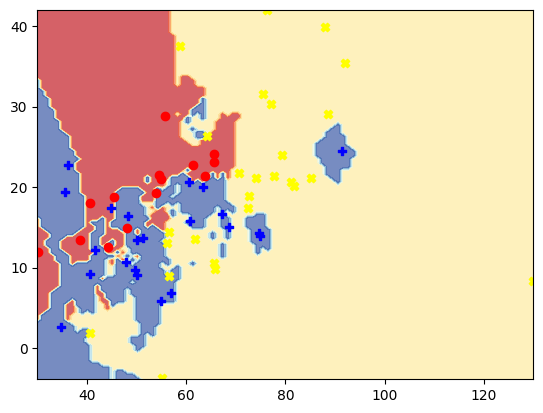

In [19]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

dh = np.where(knn_y_pred == 'DH')
sl = np.where(knn_y_pred == 'SL')
no = np.where(knn_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting dmc decision surface

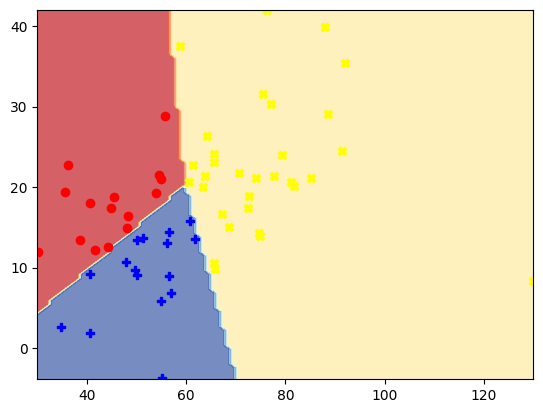

In [17]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

dh = np.where(dmc_y_pred == 'DH')
sl = np.where(dmc_y_pred == 'SL')
no = np.where(dmc_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()